In [1]:
import pandas as pd 
import numpy as np
#To do train test split at first
from  sklearn.model_selection import train_test_split
#To do cross validation
from sklearn.model_selection import cross_val_score

#Important Classification algorithm
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC #Support vector classifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
#To evoluate the model in logistic regression
from sklearn.metrics import accuracy_score

In [3]:
dia_df = pd.read_csv(r'G:\Data analyst by Shashank\Project DATA_SETS\diabetes.csv')
dia_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dia_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
dia_df.dtypes
#Checking the data types since all are float and int no worry

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
dia_df.isnull().sum()
#Checking the data is null since no data is null we are good to proceed with ML models

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
dia_corr = dia_df.corr()

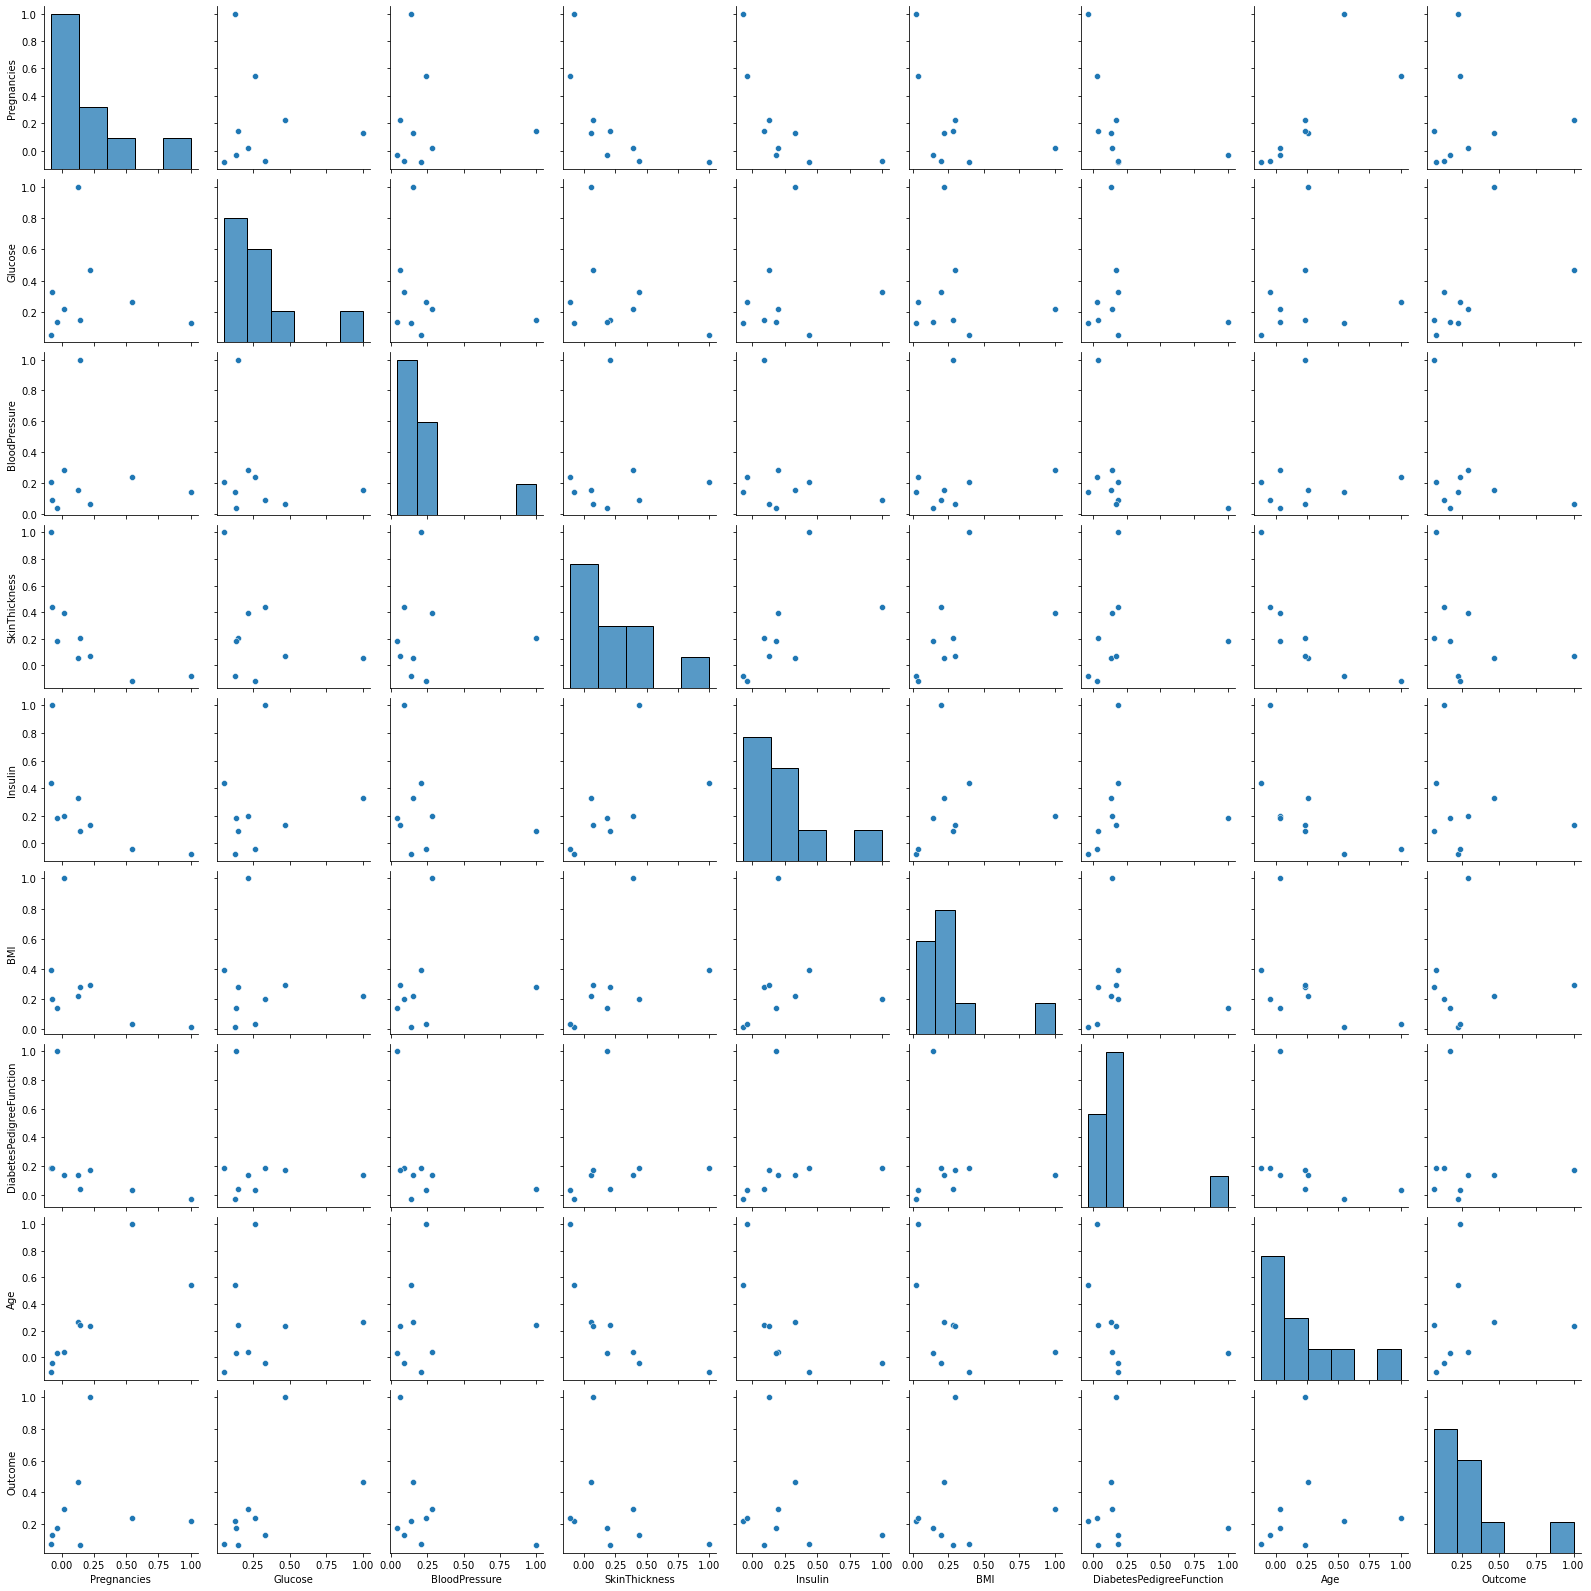

In [9]:
sns.pairplot(dia_corr)
#sns.boxplot(x=dia_df['Pregnancies'], y=dia_df['Glucose'])


<AxesSubplot:xlabel='Age', ylabel='Insulin'>

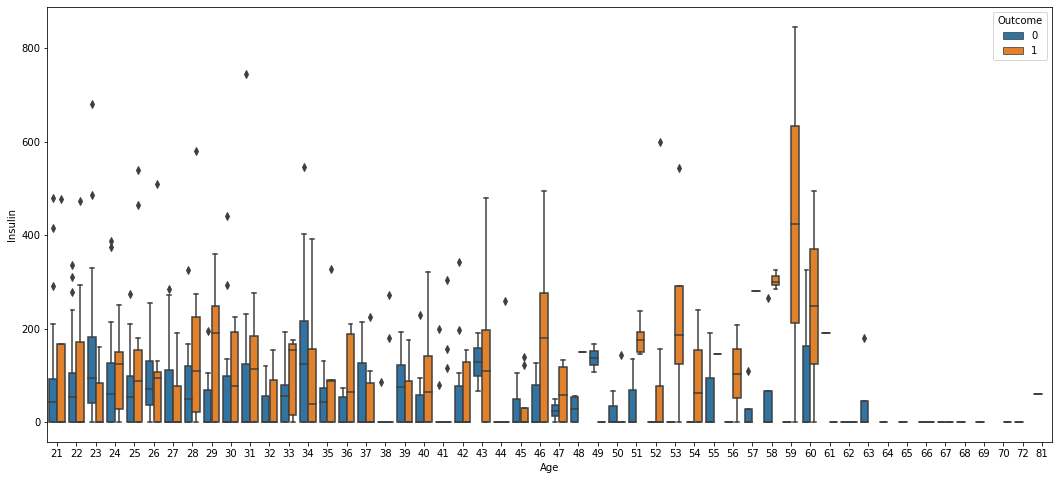

In [10]:
#As we get age we need more insuline and more chance of diabetic is also possible
plt.figure(figsize=(18,8))
sns.boxplot(x=dia_df['Age'], y=dia_df['Insulin'], hue=dia_df['Outcome'])

In [11]:
dia_df['Outcome'].value_counts()
#Found that this model should be binary classification problem since no other value other then zero and 1

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
x = dia_df.drop('Outcome', axis=1)
y = dia_df['Outcome']
print(x.shape)
print('*'*20)
print(y.shape)

(768, 8)
********************
(768,)


In [13]:
#Lets split the data in x and y and x will be out train and y is out prediction and it's a binary classification
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [14]:
print('X Training Data in rows',x_train.shape)
print('X Testing data in rows', x_test.shape)
print('***'*10)
print('Y Training Data in rows',y_train.shape)
print('Y Testing data in rows', y_test.shape)

X Training Data in rows (614, 8)
X Testing data in rows (154, 8)
******************************
Y Training Data in rows (614,)
Y Testing data in rows (154,)


In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [16]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())

pipe.fit(x_train, y_train)  # apply scaling on training data
#Pipeline created 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [17]:
train_acuracy = pipe.score(x_train, y_train)  # apply scaling on testing data, without leaking training data.
print('Training Accuracy is :',train_acuracy)
test_acuracy = pipe.score(x_test, y_test)  # apply scaling on testing data, without leaking training data.
print('Testing Accuracy is :',test_acuracy)

#Lets see other algorithms:)

Training Accuracy is : 0.7736156351791531
Testing Accuracy is : 0.7662337662337663


from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

In [18]:
# 2nd is Decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc.predict(x_test)


array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [19]:
pipe1 = make_pipeline(StandardScaler(), DecisionTreeClassifier())
pipe1.fit(x_train, y_train)  # apply scaling on training data

#DecisionTree Classifier

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [20]:
train_acuracy = pipe1.score(x_train, y_train)  # apply scaling on testing data, without leaking training data.
print('Training Accuracy is :',train_acuracy)
test_acuracy = pipe1.score(x_test, y_test)  # apply scaling on testing data, without leaking training data.
print('Testing Accuracy is :',test_acuracy)
#It's overfitted Now

Training Accuracy is : 1.0
Testing Accuracy is : 0.7272727272727273


In [21]:
pipe2 = make_pipeline(RandomForestClassifier())
pipe2.fit(x_train, y_train)  # apply scaling on training data
#Now we will do Random Forest without StandardScaler()

Pipeline(steps=[('randomforestclassifier', RandomForestClassifier())])

In [22]:
train_acuracy = pipe2.score(x_train, y_train)  # apply scaling on testing data, without leaking training data.
print('Training Accuracy is :',train_acuracy)
test_acuracy = pipe2.score(x_test, y_test)  # apply scaling on testing data, without leaking training data.
print('Testing Accuracy is :',test_acuracy)

Training Accuracy is : 1.0
Testing Accuracy is : 0.7532467532467533


In [23]:
#Lets try with standard scaler 


pipe3 = make_pipeline(StandardScaler(),RandomForestClassifier())
pipe3.fit(x_train, y_train)  # apply scaling on training data
#Now we will do Random Forest without StandardScaler()

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [24]:
train_acuracy = pipe3.score(x_train, y_train)  # apply scaling on testing data, without leaking training data.
print('Training Accuracy is :',train_acuracy)
test_acuracy = pipe3.score(x_test, y_test)  # apply scaling on testing data, without leaking training data.
print('Testing Accuracy is :',test_acuracy)
#Acuracy is almost similar

Training Accuracy is : 1.0
Testing Accuracy is : 0.7337662337662337


In [25]:
#Lets try with Support vector classifier
pipe4 = make_pipeline(StandardScaler(),SVC())
pipe4.fit(x_train, y_train)  # apply scaling on training data
#Now we will do Random Forest without StandardScaler()

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [26]:
train_acuracy = pipe4.score(x_train, y_train)  # apply scaling on testing data, without leaking training data.
print('Training Accuracy is :',train_acuracy)
test_acuracy = pipe4.score(x_test, y_test)  # apply scaling on testing data, without leaking training data.
print('Testing Accuracy is :',test_acuracy)
#Acuracy is almost similar
#Looks like SVC is also over fitted

Training Accuracy is : 0.8403908794788274
Testing Accuracy is : 0.7467532467532467


In [27]:
#Lets do the hyper parameter optimization
from sklearn.model_selection import GridSearchCV


RandomForestClassifier()
max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,

In [57]:
param_grid = { 'n_estimators' : [int(x) for x in np.linspace(start=200,stop=2000,num=10)],
              'criterion' :['gini','entropy'],
            'max_depth' : [int(x) for x in np.linspace(start=10, stop=1000,num=10)],
              'min_samples_split' : [3,5,8,10],
              'min_samples_leaf' : [3,5,8,10]
             }
print(param_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'criterion': ['gini', 'entropy'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [3, 5, 8, 10], 'min_samples_leaf': [3, 5, 8, 10]}


rfc = RandomForestClassifier()

rfc_randomcv = GridSearchCV(estimator =rfc, param_grid=param_grid, n_jobs=-1,cv=3,verbose=2)
rfc_randomcv.fit(x_train,y_train)

best_params_

In [58]:
from sklearn.model_selection import RandomizedSearchCV


In [59]:
rfc = RandomForestClassifier()
rfc_randomcv  = RandomizedSearchCV(estimator=rfc,param_distributions=param_grid,n_iter=100,n_jobs=-1,cv=5,verbose=2,
                                  random_state=100)
rfc_randomcv.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'min_samples_leaf': [3, 5, 8, 10],
                                        'min_samples_split': [3, 5, 8, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [60]:
 rfc_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_depth': 120,
 'criterion': 'gini'}

In [61]:
rfc_randomcv.best_estimator_

RandomForestClassifier(max_depth=120, min_samples_leaf=3, min_samples_split=10,
                       n_estimators=200)

In [62]:
best_random_fit = rfc_randomcv.best_estimator_

In [63]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred = best_random_fit.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))
print("Classification Report: {}".format(classification_report(y_test,y_pred)))

[[88  7]
 [31 28]]
Accuracy Score: 0.7532467532467533
Classification Report:               precision    recall  f1-score   support

           0       0.74      0.93      0.82        95
           1       0.80      0.47      0.60        59

    accuracy                           0.75       154
   macro avg       0.77      0.70      0.71       154
weighted avg       0.76      0.75      0.74       154



In [68]:
grid_search = {'n_estimators':[200],
 'min_samples_split':[9,10,11,12],
 'min_samples_leaf': [2,3,4,5],
 'max_depth': [110,120,130],
 'criterion': ['gini']  
}

In [69]:
rfc_grid_search = GridSearchCV(estimator=rfc,param_grid=grid_search,cv=10, n_jobs=-1,verbose=2)
rfc_grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [110, 120, 130],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [9, 10, 11, 12],
                         'n_estimators': [200]},
             verbose=2)

In [70]:
rfc_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 110,
 'min_samples_leaf': 3,
 'min_samples_split': 9,
 'n_estimators': 200}

In [72]:
rfc_grid_search.best_estimator_

RandomForestClassifier(max_depth=110, min_samples_leaf=3, min_samples_split=9,
                       n_estimators=200)

In [73]:
best_grid = rfc_grid_search.best_estimator_

In [74]:
y_pred = best_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))
print("Classification Report: {}".format(classification_report(y_test,y_pred)))

[[86  9]
 [29 30]]
Accuracy Score: 0.7532467532467533
Classification Report:               precision    recall  f1-score   support

           0       0.75      0.91      0.82        95
           1       0.77      0.51      0.61        59

    accuracy                           0.75       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.75      0.74       154



In [77]:
grid_search_dtc = {'random_state':[int(x) for x in np.linspace(10,200,10)],
 'min_samples_split':[9,10,11,12],
 'min_samples_leaf': [2,3,4,5],
 'max_depth': [110,120,130],
 'criterion': ['gini','entropy']  
}

In [75]:
dtc = DecisionTreeClassifier()

In [78]:
rfc_grid_search = GridSearchCV(estimator=dtc,param_grid=grid_search_dtc,cv=20, n_jobs=-1,verbose=2)
rfc_grid_search.fit(x_train, y_train)

Fitting 20 folds for each of 960 candidates, totalling 19200 fits


GridSearchCV(cv=20, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [110, 120, 130],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [9, 10, 11, 12],
                         'random_state': [10, 31, 52, 73, 94, 115, 136, 157,
                                          178, 200]},
             verbose=2)

In [79]:
rfc_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 110,
 'min_samples_leaf': 3,
 'min_samples_split': 11,
 'random_state': 178}

In [80]:
rfc_grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=110, min_samples_leaf=3,
                       min_samples_split=11, random_state=178)

In [81]:
rfc_dtc_best_model = rfc_grid_search.best_estimator_
y_pred = rfc_dtc_best_model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))
print("Classification Report: {}".format(classification_report(y_test,y_pred)))

[[75 20]
 [27 32]]
Accuracy Score: 0.6948051948051948
Classification Report:               precision    recall  f1-score   support

           0       0.74      0.79      0.76        95
           1       0.62      0.54      0.58        59

    accuracy                           0.69       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.69      0.69      0.69       154

